# linear Regression Example and implementation:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import sys
from ml_implement.general_utils.univershal_plotter import UniversalPlotter

In [ ]:
base_dir = Path.cwd().parent 
base_dir = Path(base_dir)
print(f"Base directory: {base_dir}")
from ml_implement.general_utils.data_read import DataReader

In [ ]:

filename = 'realest.csv'
filepath = base_dir/'data'/'Linear_Regression'/'chicago_houseprice'
# reader = DataReader(filepath, filename)
# reader = DataReader(filepath=filepath, filename=filename, split=True, df_want=True, target_column="Price")
reader = DataReader(filepath=filepath, filename=filename, split=True, df_want=True, target_column=None)
res = reader.run() # result.

In [ ]:
datafile = r"/home/mrafiku/AI_learning/machine-learning-basics/data/Linear_Regression/placementdata/placement.csv"
datafile = Path(datafile)
df = pd.read_csv(datafile)
print(df.head())
# print(df.info())
# print(df.describe())


In [ ]:
# CSV files often include:
# Leading/trailing spaces
# Hidden characters
# -  Uppercase/lowercase mismatches
# -  UTF-8 BOM characters
# -  Inconsistent headers
# Even if the DataFrame looks correct, the internal label might be different.

print(df.columns.tolist())
# print(df.columns)
# Fix: normalize column names
df.columns = df.columns.str.strip().str.lower()


In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs package')
plt.show()


In [ ]:
df.shape # (n_rows, n_columns)
df.size  # total number of elements in the DataFrame
df.ndim  # number of dimensions (axes) of the DataFrame
print(f"DataFrame Shape: {df.shape} | Size: {df.size} | Dimensions: {df.ndim}")

In [ ]:
# X = df["cgpa"]
# X.shape
# X.ndim
# X = np.array(X).reshape(-1,1)
# # X = X.reshape(-1,1)
# X.shape 

In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values 
print(f"X shape: {X.shape} | type ox X: {type(X)}| y shape: {y.shape} | type of y: {type(y)}")

if X.ndim == 1:
    X = X.reshape(-1,1)
if y.ndim == 1:
    y = y.reshape(-1,1)
print(f"After Reshaping: X shape: {X.shape}, y shape: {y.shape} ")


- df.describe()
- df.columns.tolist()
- print(f" {X} \n {y}")
- print(f"X shape: {X.shape}, y shape: {y.shape} and \n X type: {type(X)} | y type: {type(y)} ")  
#--> These are the output of the print statement 
- those clearly shows: That shapes of X,y is one D array, so for the Sklearn we need to reshape it to 2D array : for fit and predict methods. 
- X shape: (200,), y shape: (200,) and 
- X type: <class 'numpy.ndarray'> | y type: <class 'numpy.ndarray'>
#--> Reshaping the X to 2D array in th ebelow next cell: ---> 

In [ ]:
# " this is function to fit Linear Regression model and return X_train,X_test,y_train, y_test,model"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def LR_modelfit_predict_Result(X, y,test_size = None):
    """
    Docstring for fit_LR_model_predict_Result is return result: X_train,X_test,y_train, y_test,model
    :param X: X is numpy array of shape (n_samples, n_features)
    :param y: y is numpy array of shape (n_samples, )
    :param test_size: test_size is None,bydefault is 0.2 if None, 0 if 0, else float value between 0 and 1
    :return: X_train,X_test,y_train, y_test,model
    """
    if X.ndim == 1:
        X = X.reshape(-1,1)
    if y.ndim == 1:
        y = y.reshape(-1,1)
    if test_size == 0:
        print("using all data for training as test_size is 0")
        X_train, y_train = X,y
    if test_size is None:
        test_size = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    if test_size is not None and test_size !=0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape} , y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
    model = LinearRegression()
    model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    return X_train,X_test,y_train, y_test,model
    # print(f"input_CGPA: {X_test[0,0]}, PREDICTED_PACKAGE: {y_pred[0,0]} and ACTUAL PACKAGE: {y_test[0,0]}")

In [ ]:
# this a module to import the metric of the linear regression from scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
X_train,X_test,y_train, y_test,model = LR_modelfit_predict_Result(X, y,test_size=0.2)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2_score: {r2}")

In [ ]:
# sklearn.datasets..make_regression() --> used to generate the regression datasets provided by the scikit-learn.

from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

X,y =  make_regression(n_samples = 100,n_features=2,n_informative=2,n_targets=1,noise=0.1, random_state=42)
# print(f"{X} \n {y}")
x1 = X[:,0]
x2 = X[:,1]
# plt.scatter(x1,x2,y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x1, x2, y, c=y, cmap='viridis', s=40, alpha=0.8)



ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D scatter: x1, x2 vs y')
fig.colorbar(sc, ax=ax, shrink=0.5, label='y')
plt.show()

In [ ]:
# write code for linear regresssion model from the basics without using sklearn library.

In [ ]:
class LinearRegressionMine():
    def __init__(self):

        pass
    def fit(self,X,y):
        n = X.shape[0]  # number of training examples.
        d = X.shape[1]  # numbers of features
        
        X = np.hstack((np.ones((n,1)),X))  # adding bias term to the feature matrix. 
        A = (X.T)@X
        A_inv = np.linalg.inv(A)
        B = (X.T)@y
        Theta = A_inv @ B   # parameters of the model.
        self.theta = Theta
        return Theta
    
    def predict(self,X):
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),X))  # adding bias term to the feature matrix. 
        y_pred = X @ self.theta
        self.y_pred = y_pred
        return y_pred
    
    def MAE(self,y_true,y_pred):
        n_test = y_true.shape[0]
        mae = np.abs(np.sum(y_true - y_pred))/n_test
        return mae
    
    def MSE(self,y_true,y_pred):
        n_test = y_true.shape[0]
        mse = np.sum((y_true - y_pred)**2)/n_test
        return mse
    def RMSE(self,y_true,y_pred):
        mse = self.MSE(y_true,y_pred)
        rmse = np.sqrt(mse)
        return rmse
    def R2_score(self,y_true,y_pred):
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_residual = np.sum((y_true - y_pred)**2)
        r2 = 1 - (ss_residual/ss_total)
        return r2




In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2,random_state = 42)
# print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape} , y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
mlr = LinearRegressionMine()
mlr.fit(X_train,y_train)
y1_pred = mlr.predict(X_test)


In [ ]:
print(f"input_CGPA: {X_test[0,0]}, PREDICTED_PACKAGE: {y1_pred[0,0]} and ACTUAL PACKAGE: {y_test[0,0]}")
# input_CGPA: 6.63, PREDICTED_PACKAGE: 2.7803134765595168 and ACTUAL PACKAGE: 2.79
ame = mlr.MAE(y_test,y1_pred)
mse = mlr.MSE(y_test,y1_pred)
rmse = mlr.RMSE(y_test,y1_pred)
r2 = mlr.R2_score(y_test,y1_pred)   
print(f"AME: {ame}, MSE: {mse}, RMSE: {rmse}, R2_score: {r2}")
# MAE: 0.23150985393278373, MSE: 0.08417638361329656, RMSE: 0.2901316659954521, R2_score: 0.7730984312051673

# here we can see the results are comparable with the sklearn library.

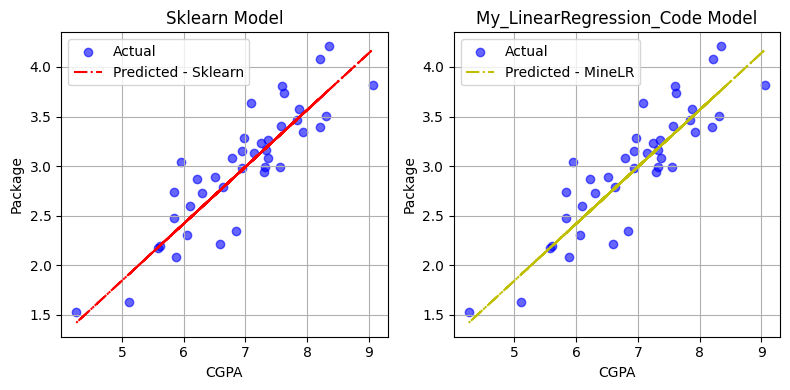

In [ ]:
import matplotlib.pyplot as plt

# 1. Initialize the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# --- FIRST SUBPLOT (Index 0) ---
ax[0].scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
ax[0].plot(X_test, y_pred, '-.r', label='Predicted - Sklearn')
ax[0].set_xlabel('CGPA')
ax[0].set_ylabel('Package')
ax[0].set_title('Sklearn Model')
ax[0].grid(True)  # Use ax[0].grid() instead of plt.grid()
ax[0].legend()

# --- SECOND SUBPLOT (Index 1) ---
ax[1].scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
ax[1].plot(X_test, y1_pred, '-.y', label='Predicted - MineLR')
ax[1].set_xlabel('CGPA')
ax[1].set_ylabel('Package')
ax[1].set_title('My_LinearRegression_Code Model')
ax[1].grid(True)  # Use ax[1].grid() instead of plt.grid()
ax[1].legend()

# Final adjustments
plt.tight_layout() 
plt.show()


In [ ]:
# Gradient Descent: 
# bn+1  = bn - α * ∇J / @ b = bn 

In [ ]:
from sklearn.datasets import make_regression
X,y  = make_regression(n_samples=7, n_features=1, n_targets=1, noise=50, random_state=42)
# from sklearn.Linear_model import LinearRegression

model  = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X,y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [ ]:
y.shape

In [ ]:
from pathlib import Path
# model.intercept_  # b0  --> bias term
model.coef_       # b1  --> weight term
m = model.coef_[0]  # slope (m)
print(f"Slope (m): {m} and shape : {model.coef_.shape} ")
 
learning_rate = 0.01  # learning rate
n = X.shape[0]  # number of training examples
b = 0
epochs = 25
        
plt.figure(figsize=(8,5.6))
for  i in range(1,epochs+1):
    gradient_m = -2*(np.sum(y) -m*np.sum(X) - n*b)
    stepsize = learning_rate*gradient_m # step size = LearningRate * gradient
    b = b - stepsize  # gradient decent formula.

    ygds = m*X + b
    # Only label the first and last epoch to keep legend clean
    label = f'Epoch {i}' if i == 1 or i == epochs or  i%5 == 0  else None
    plt.plot(X,ygds,'-.',label=label,alpha=0.2)

plt.plot(X, y_pred,color='red',label='Linear Regression fit')
plt.scatter(X,y, color='blue', label='Data Points')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Progression and Linear Regression (Red Line)')
plt.legend()


# plt.show()


main_path  = Path("/home/mrafiku/AI_learning/machine-learning-basics")
results_path = main_path / "results"
result_Linear_Regression_gdsc = results_path / "Linear_Regression"/"usingGdsc"
result_Linear_Regression_gdsc.mkdir(parents=True, exist_ok=True)
filename = f"gdsc_progression_epochs_{epochs}_ALL.png"
plt.savefig(result_Linear_Regression_gdsc / filename)
plt.show()
plt.close(20)


# The Below cell code is to convert the png images to .gif image.

from PIL import Image - # pip install pillow
import os
from pathlib import Path

# 1. Define paths
image_path = Path("/home/mrafiku/AI_learning/machine-learning-basics/results/Linear_Regression/usingGdsc")
gif_path = image_path / "gdsc_animation.gif"

# 2. Grab all images and sort them numerically
# It's important to sort them so the animation follows the epoch order
images = sorted(list(image_path.glob("gdsc_progression_epochs_*.png")), 
                key=lambda x: int(x.stem.split('_')[-1]))

# 3. Load images into a list
frames = [Image.open(img) for img in images]

# 4. Save as GIF
if frames:
    frames[0].save(
        gif_path,
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=500, # 500ms per frame (half a second)
        loop=0        # 0 means it loops forever
    )
    print(f"GIF saved successfully at: {gif_path}")
else:
    print("No images found to create GIF.")

## This below is Mine code for the 'Batch gradient descent algorithm'.
## This is compared with the SKLEARN Linear Regression and Graph of both is also compared.
## carefull about the learning rate (alpha):
-1 alpha should not be much less.

-2 alpha should not be too high -> otherwise Never converge.

-3 alpha should be appropraite. If data is normalize between [-1,1] then can choose alpha = 0.01 

In [ ]:
from ml_implement.architecture.gradient_dsc_mine import Mine_GradientDescent_LinaerRgression # this is mine gds LR

In [ ]:
# class Mine_GradientDescent_LinaerRgression:
#     def __init__(self,learning_rate = None,epochs =None,initial_b =None, initial_w =None):
#         self.learning_rate = learning_rate
#         self.epochs = epochs
#         self.b = initial_b
#         self.w = initial_w
#         self.J_w_b_history = {"w":[], "b":[], "J_cost":[]}
#         # self.J_cost_hsitory = []

#     def fit(self,X,y):
#         X = np.asarray(X, dtype=float)
#         y = np.asarray(y, dtype=float)
#         X = X.reshape(-1, X.shape[1])  # Ensure X is 2D
#         m,d = X.shape
#         if self.w is None:
#             self.w = np.zeros((d,1))
#         # self.w = np.zeros((d,1))  # initializing weights to zero vector of shape (d,1)
#         # print(f"d : {d} - {self.w.shape} initial w: {self.w.flatten()} and shape of w: {self.w.shape} and initial b: {self.b}")

#         for epoch in range(self.epochs):
            
#             unitV = np.ones((m,1))    
#             y = y.reshape(-1,1)
#             # print(f" shape of the unitV: {unitV.shape} and Transpose of unitV: {(unitV.T).shape}")
            
#             y_hat = X@self.w + self.b*unitV  # prediction using the hypothesis, written in matrix form so, 
#             # it can work for single features as well as muultiple features. and cover the m no of training example as well as for single traing example.

#             error = y_hat - y   # this term is common in both the gradient of b,w.[Xw + b*1 - y]-> [X(mxd)W(dx1) + b*1(1Xm unit vector) - y(mx1))]
#             # self.J_cost_hsitory["J_cost"].append(np.mean(error**2))  # cost function history for each epoch.
#             # grad_b = np.mean(error) or 1/m*unitV.T @ error or 1/m*np.dot(unitV.T,error)
#             # grad_b = 1/m*unitV.T@ (X@self.w + self.b*unitV - y)
#             # grad_b = np.mean(error)
#             # grad_b = 1/m*np.dot(unitV.T,error)
#             grad_b =  1/m*unitV.T @ error
#             self.b = self.b - self.learning_rate*grad_b

#             # grad_w = 1/m*X.T @ (X@self.w +self.b*unitV - y)
#             grad_w = 1/m*X.T@ error
#             self.w = self.w - self.learning_rate*grad_w
#             # print(f"Epoch: {epoch+1}/{self.epochs},coefficient (w): {self.w.flatten()} intercept_b: {self.b} ")
#             self.J_w_b_history["w"].append(self.w.flatten())
#             self.J_w_b_history["b"].append(self.b)
#             self.J_w_b_history["J_cost"].append(np.mean(error**2))
            
#         return self.b,self.w,self.J_w_b_history 
    
#     def predict(self,X_test):
#         X_test = np.asarray(X_test, dtype=float)
#         unitV1 = np.ones((X_test.shape[0],1))
#         y_pred = unitV1*self.b + X_test@self.w
        
#         return y_pred
        

In [ ]:
# base_dir
filename =  "placement.csv" # "realest.csv" #"placement.csv"
filepath = "/home/mrafiku/AI_learning/machine-learning-basics/data/Linear_Regression/placementdata" # "/home/mrafiku/AI_learning/machine-learning-basics/data/Linear_Regression/chicago_houseprice/" 
filepath =  Path(filepath)    
print(f"filepath: {filepath}")
reader = DataReader(filepath, filename,df_want = True,split = True)
df, X_train, X_test, y_train, y_test = reader.run() # df, X_train, X_test, y_train, y_test

In [ ]:
# X_test,y_test
print(f"X_test:{X_test.shape} type: {type(X_test)} and y_test : {y_test.shape}")
print(f"X_train:{X_train.shape} and y_train : {y_train.shape}")
# y_train

In [ ]:
import numpy as np
epochs = 1000
MyGd = Mine_GradientDescent_LinaerRgression(learning_rate=0.001,epochs=epochs,initial_b=0, initial_w = None) 
MyGd.fit(X_train,y_train)
intercept = MyGd.b
coefficient = MyGd.w
print(f"Coefficient (w): {coefficient.flatten()} and Intercept (b): {intercept} ")

w = MyGd.J_w_b_history["w"]
b = MyGd.J_w_b_history["b"]
j_cost = MyGd.J_w_b_history["J_cost"]

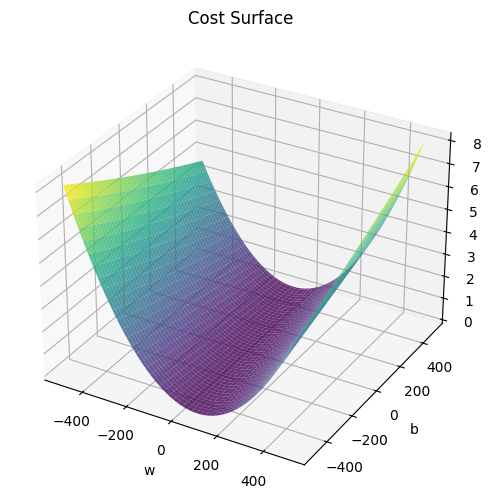

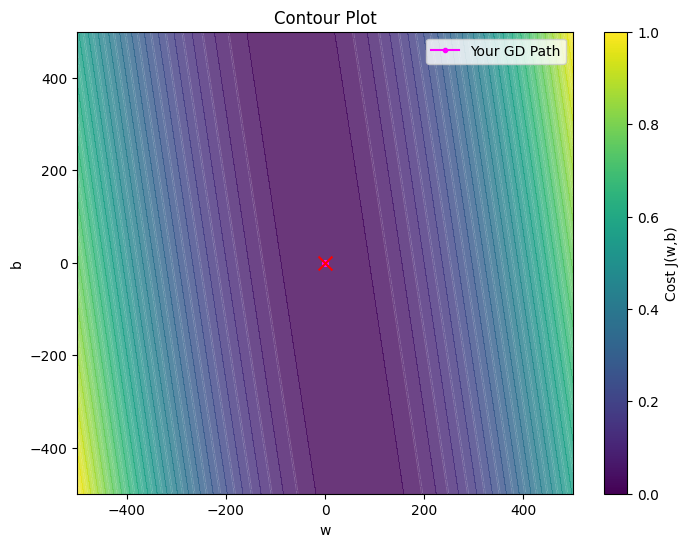

In [ ]:
w_flat = np.array(MyGd.J_w_b_history["w"]).flatten()
b_flat = np.array(MyGd.J_w_b_history["b"]).flatten()

import numpy as np
import matplotlib.pyplot as plt

# 1. Create a "Map" (Grid) around your path
# Find the min/max of your history to set the plot boundaries
w_range = np.linspace(min(w_flat)-500, max(w_flat)+500, 100)
b_range = np.linspace(min(b_flat)-500, max(b_flat)+500, 100)
W, B = np.meshgrid(w_range, b_range)

# 2. Calculate the Cost for the ENTIRE grid
# You need your actual compute_cost function here
def compute_cost(x, y, w, b):
    m = len(x)
    return (1/(2*m)) * np.sum((w * x + b - y)**2)

# Vectorize the cost calculation for the grid
Z = np.zeros(W.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i,j] = compute_cost(X_train, y_train, W[i,j], B[i,j])


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(W,B,Z,cmap='viridis',alpha=0.8)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost J(w,b)')
ax.set_title('Cost Surface')
plt.show()


print("Warning: NaN values found in cost grid. Check compute_cost function and input data.")    
# 3. Plot the "Full Bowl" (Concentric Circles)
plt.figure(figsize=(8, 6))
# Using plt.contour (lines) and plt.contourf (filled colors)
plt.contourf(W, B, Z, levels=50, cmap='viridis', alpha=0.8)
plt.contour(W, B, Z, levels=20, colors='white', alpha=0.2) # Adding line rings

# 4. Overlay YOUR Gradient Descent path on the map
plt.plot(w_flat, b_flat, color='magenta', marker='.', label='Your GD Path')
plt.scatter(w_flat[-1], b_flat[-1], color='red', marker='x', s=100, zorder=5)

plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour Plot')
plt.colorbar(label='Cost J(w,b)')
plt.legend()
plt.show()



In [ ]:

j_cost = MyGd.J_w_b_history["J_cost"]
# iterations = range(1,epochs+1)
iterations = range(1,len(j_cost)+1)
fig,ax =  plt.subplots(1,1)
ax.plot(iterations, j_cost, '-.g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost J(b,w)')
ax.set_title('Cost Function History during Gradient Descent')
ax.grid()
plt.show()

In [ ]:

# MyGd = Mine_GradientDescent_LinaerRgression(learning_rate=0.1,epochs=25,initial_b=0, initial_w = np.zeros((X.shape[1],1)))
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(f"SKLEARN : --> model.coef_: {model.coef_} and model.intercept_: {model.intercept_}")
y_pred_gd = MyGd.predict(X_test)

fig,ax = plt.subplots(1,2, figsize=(11,6.3))
ax[0].plot(X_test,y_pred_gd,'-.y',label='Predicted - MyGdsc')
ax[0].scatter(X_test,y_test, color='blue', label='Actual', alpha=0.6)
ax[0].set_xlabel('CGPA')
ax[0].set_ylabel('Package')
ax[0].set_title('My Gradient Descent Linear Regression')
ax[0].grid()
ax[1].plot(X_test,y_pred,'-.r',label='Predicted - Sklearn')
ax[1].scatter(X_test,y_test, color='blue', label='Actual', alpha=0.6)
ax[1].set_xlabel('CGPA')
ax[1].set_ylabel('Package')
ax[1].set_title('My sklearn Regression')
ax[1].grid()
plt.legend()
plt.show()

# Coefficient (w): [0.54925495] and Intercept (b): -0.8101326877470646 
# SKLEARN : --> model.coef_: [[0.57425647]] and model.intercept_: [-1.02700694]

In [ ]:
print(X)
y1 =X[[3]]
y2 = X[3]
print(f"shape y1 :{y1.shape}, and shape of y2:{y2.shape}")
print(X[[3]])

## Confusion in why Stochastic is faster than the Batch gradient descent method: 
-    In stochastic if we see in each epoch the loop it is iterating as number of time as Number of row in  X_tarin (number of training examples). 
-   But weight converge faster than the batch gradient, because in batch we get weight after all traing examples.
-   raw number of mathematical operations per epoch, SGD actually involves slightly more overhead because you are updating the weights 1000(number of training examples, let'say 1000) times instead of once.
-   However, "Faster" in Machine Learning doesn't mean "the loop runs faster." It means "it reaches the **minimum error in much less time.**"
1. **The Practical Example: 1000 Rows, 3 Features** 
    - Let’s use your dimensions: $X$ is $1000 \times 3$.

    **Batch Gradient Descent (The "Wait for it..." approach)** 
    - **The Math:** You calculate the prediction for all 1,000 rows. You calculate the error for all 1,000 rows. You sum them up.
    - **The Update:** You move your weights once.The Problem: If you have 1,000,000 rows instead of 1,000, your computer might run out of RAM just trying to calculate that one single step. You are doing a massive amount of work for one tiny adjustment.
    **Stochastic Gradient Descent (The "Quick Learner" approach)**
    - **The Math:** You look at Row #1. You immediately see that the weight for Feature #1 is too high. 

    **The Update:** You move your weights immediately.

    **The Speed Advantage:** By the time you have finished your first epoch (looped 1,000 times), you have adjusted your weights 1,000 times.The Result: Usually, SGD finds a "good enough" solution after only 1 or 2 epochs. Batch GD might need 100 epochs (100 full passes) to get to that same level of accuracy.

    **Analogy**

    - **Batch:** Imagine you are learning to throw a ball into a hoop.Batch: You throw 1,000 balls, someone records where they all landed, averages the distance, and then tells you: "Next time, aim 2 inches higher.

   - **Stochastic:**  You throw one ball. It goes low. You immediately adjust your aim for the second ball. By the 1,000th ball, you are already hitting the hoop.

## 2. Step-by-Step Difference in Matrix Operations

Let's look at what's happening to the weights **$\mathbf{w}$** (a **$3 \times 1$** vector) in one epoch.
I am using the diabities dataset: which has 442 rows(training examples) and some features.
| Step | Batch GD | Stochastic GD (SGD) | Mini-Batch GD |
|------|----------|----------------------|---------------|
| **1. Data Access** | Looks at all 442 rows at once. | Looks at 1 row at a time. | Looks at a **"chunk"** (e.g., 32 rows). |
| **2. Gradient Calc** | Calculates the average slope of all 442 points. | Calculates the slope of just that 1 point. | Calculates the average slope of those 32 points. |
| **3. Update** | Updates weights once per epoch. | Updates weights 442 times per epoch. | Updates weights 14 times (442/32) per epoch. |
| **4. Efficiency** | Slow. Must wait for all math to finish. | Fast per step, but inefficient for CPUs. | Sweet Spot. Uses **"Vectorization"** to do math fast. |

- this is another table:

| Step | Batch Gradient Descent | Stochastic Gradient Descent |
|------|-------------------------|-----------------------------|
| **Input size** | $1000 \times 3$ matrix | $1 \times 3$ vector |
| **Gradients** | $\frac{1}{n}\mathbf{X}^T(\mathbf{X}\mathbf{w}-\mathbf{y})$ | $\mathbf{x}_i^T(\mathbf{x}_i\mathbf{w}-y_i)$ |
| **Update frequency** | Once per epoch | 1,000 times per epoch |
| **Hardware** | Uses vectorization (**Fast**) | Heavy looping (**Slow**) |
| **Convergence** | Takes many full passes to learn | Learns almost everything in the first pass |


In [ ]:
w1 = np.zeros((3,1))
# w1.ndim
w1.shape
# Stochastic Gradien Batch Algorithm:
X = np.random.randint(0,100,size=(5,2))
print(f"Original order of indices:\n {X}")
for i in range(2):
    # print(f"Epoch {i+1}:")
    ind = np.random.permutation(5)
    # print(f"iteration {i}: {ind} and shape of ind: {ind.shape} and dimension:{ind.ndim} ")
    X_suffle = X[ind]
    # print(f"Shuffled X:\n {X_suffle}\n and shape of x_suffle:{X_suffle.shape}")
x_i = X_suffle[2].reshape(-1,1)
print(f" before  x_i :{x_i.shape}")
# x_i.reshape(-1,1)
# x_i.shape
x_t = x_i.T
print(f"x_ after reshaping to 1 row: {x_i.T}\n and \n{x_t.shape}")



In [ ]:
class StocasticGD:
    def __init__(self,learning_rate = None,epochs = None ):
        self.lr = learning_rate if learning_rate is not None else 0.01
        self.epochs = epochs if epochs is not None else 1000
        self.w = None
        self.b = 0
        self.jcost = []
        
    def fit(self,X,y):
        m,d = X.shape
        if self.w is None:
            # self.w = np.zeros(d)
            self.w = np.zeros((d,1)) # matrix form.
            print(f"size of w just after initializing with np.zeros:-----------> {self.w.shape}")
            # jcost = []
            unitV = np.ones((m,1)) 
    
        # self.w = np.zeros((d,1))  # initializing weights to zero vector
        for epoch in range(self.epochs):
            # suffle the Xin ecah epoch.
            indices  = np.random.permutation(m) # it will create the random number of sequence between 0(include) to m(not included).
            # indices0_4 = np.random.permutation(5) # o/p like this--> [4 0 3 1 2] ecah time it will be different but b/w 0-5(not included).

            X_suffle = X[indices] # X_suffle :--> rows of X is suffled randomly.with shape m,d
            y_suffle = y[indices] # similarly y row also suffled randomly each epoch.
            J_error =  [] # for each loop.
            for i in range(m):

                # Pick ONE sample (Vectorized as 1xFeatures: X_suufle[i] -> is vector of size 1xFeatures )
                # x_i = X_suffle[i]
                x_i = X_suffle[i].reshape(-1,1).T  # This is just for writing in matrix form.
                # y_i = y_suffle[i]
                y_i = y_suffle[i].reshape(1,1)   # This is also for just writing in the matrix form.

                # 4. Predict (Dot product: Scalar result)
                # y_hat = np.dot(x_i,self.w) + self.b

                y_hat = x_i@self.w + self.b

                # error is a scalar
                error = y_hat - y_i #  Compute Gradients (Matrix Form)
                squared_error = error**2
                J_error.append(squared_error) # sqaure of error.
                # dw = x_i*error # dw = x_i * error (Result is a vector of shape n_features)
                dw = x_i.T * error # dw = x_i * error (Result is a vector of shape n_features)

                db = error
                # if (i == 0) and (epoch == 0 or epoch == self.epochs) or (i == m-1)and(epoch == 0 or epoch == self.epochs):
                #     print(f"x_i after reshaping an dtranspose:(expected:1x nfeatures) size::---------->{x_i.shape}")
                #     print(f"y_i after reshaping an dtranspose:(expected:1x1) size::---------->type of {type(y_i)} and {y_i.shape}")
                #     print(f"y_hat after reshaping an dtranspose:(expected:1x1) size::---------->type of {type(y_hat)} and {y_hat.shape}")

                #     print(f"y_hat size::---------->{y_hat.shape}")
                #     print(f"error size:----------> {error.shape}")
                #     print(f"dw size:---------->{dw.shape}")
                #     print(f"db size:---------->{db.shape} and its type: {type(db)}")

            # Update Parameters 
                self.w -= self.lr*dw
                self.b -= self.lr*db
            J_errorMean = np.mean(J_error)          
            self.jcost.append(J_errorMean)
            
        return self.jcost

    def predict(self,X):
        # X --> X_test # Full Matrix Multiplication for prediction: Y = Xw + b
        unitV1 = np.ones((X_test.shape[0],1))
        # y_predict_dot_method=  np.dot(X, self.w) + self.b
        
        y = X@self.w + unitV1@self.b  
        # y = X@self.w + self.b *unitV1
        return y


#  this is for the class.
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
print(f"diabities data sets: {type(load_diabetes)} and X,y: {X.shape}and y :{y.shape}")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
mystochastic_gd = StocasticGD(epochs=100)
mystochastic_gd.fit(X_train,y_train)
mystochastic_gd.predict(X_test)

# Plotting the result
num_epochs = mystochastic_gd.epochs
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), mystochastic_gd.jcost)
plt.title("Cost (SGD) :large beacuse data is not normalize for best result Normalize data ")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Aftere scaling we see the cost .
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

print(f"diabities data sets: {type(load_diabetes)} and X,y: {X.shape}and y :{y.shape}")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
#  scaling the train and test data:
scaler = StandardScaler()  # Fit only on training data to avoid "data leakage"
# Transform test data using the mean/std from training data
X_train_scaled = scaler.fit_transform(X_train)  # for more deatils see the notes/.. docs.
X_test_scaled = scaler.transform(X_test)  
#  this the meansquare error WITHOUT normalization of the data. 
MiniBatch_gd = StocasticGD(epochs=100)
MiniBatch_gd.fit(X_train,y_train)
MiniBatch_gd.predict(X_test)

#  this the meansquare error with NORMALIZATION  of the data. 
mystochastic_gd_scaled = StocasticGD(epochs=100)
mystochastic_gd_scaled.fit(X_train_scaled,y_train)
mystochastic_gd_scaled.predict(X_test_scaled)

# bOTH SCALED AND UNSCALED  the result Plotting
fig,ax = plt.subplots(1,2)
num_epochs = mystochastic_gd.epochs
ax = ax.flatten()
ax[0].plot(range(num_epochs), mystochastic_gd_scaled.jcost)
ax[0].set_title("Cost (SGD) : scaled/Normalize data ")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Mean Squared Error")
ax[0].grid()
ax[1].plot(range(num_epochs), mystochastic_gd.jcost)
ax[1].set_title("Cost (SGD) : Unscaled/Raw data")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Mean Squared Error")
ax[1].grid()
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Create a grid of plots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Diabetes Features vs. Disease Progression", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.scatter(X[:, i], y, alpha=0.5, s=10, c='teal')
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel("Target (y)")
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

path w copy:[array([[0.],
       [0.]])] and 1 and shape of ecah element of path:(2, 1)


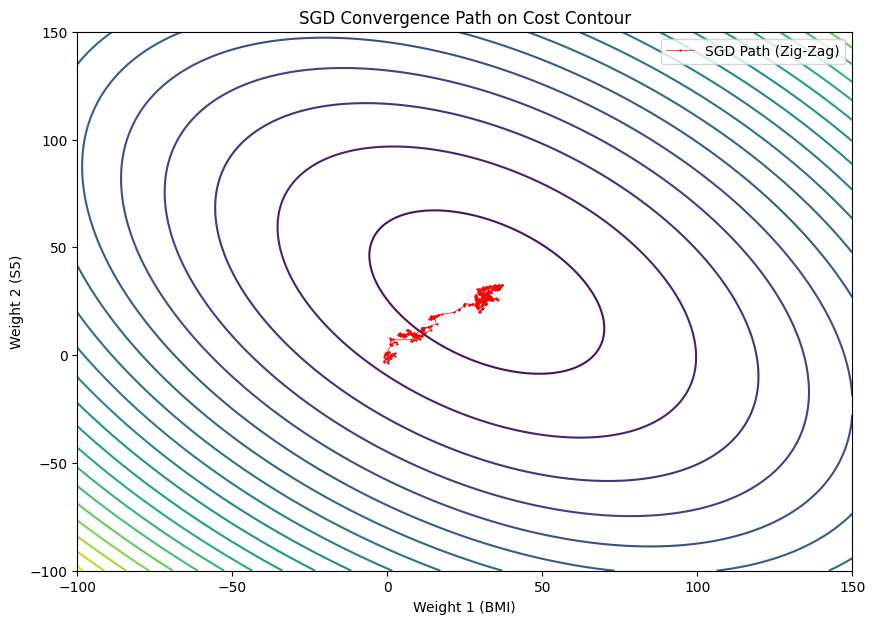

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# 1. Prepare Data (2 features only for visualization)
data = load_diabetes()  # or  X,y = load_diabetes(return_x_y = True) 
X = data.data[:, [2, 8]] # BMI and S5 index omly two X
y = data.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 2. Modified SGD to track weight history
def get_sgd_path(X, y, lr=0.1, epochs=3):
    m, d = X.shape
    w = np.zeros((d, 1))
    b = 0
    path = [] # To store (w1, w2)
    
    for epoch in range(epochs):
        for i in range(m):
            # Save current weights before update
            path.append(w.copy())
            if i == 0:
                print(f"path w copy:{path} and {len(path)} and shape of ecah element of path:{path[i].shape}")

            x_i = X[i:i+1]
            y_i = y[i:i+1]
            
            # Predict and update
            y_hat = x_i @ w + b
            error = y_hat - y_i
            dw = x_i.T * error
            
            w -= lr * dw
            b -= lr * error.item()
            
    return np.array(path).reshape(-1, 2)

# 3. Function to plot the Contour and Path
def plot_contour_path(X, y, path):
    # Create a grid of weight values
    w1_range = np.linspace(-100, 150, 200)
    w2_range = np.linspace(-100, 150, 200)
    W1, W2 = np.meshgrid(w1_range, w2_range)
    
    # Calculate Cost (MSE) for every point on the grid
    Z = np.zeros(W1.shape)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w_temp = np.array([[W1[i,j]], [W2[i,j]]])
            y_pred = X @ w_temp # Ignoring bias for simple visualization
            Z[i,j] = np.mean((y_pred - y)**2)

    # Plotting
    plt.figure(figsize=(10, 7))
    plt.contour(W1, W2, Z, levels=20, cmap='viridis')
    plt.plot(path[:, 0], path[:, 1], color='red', marker='*', 
             markersize=1, linewidth=0.5, label='SGD Path (Zig-Zag)')
    
    plt.title("SGD Convergence Path on Cost Contour")
    plt.xlabel("Weight 1 (BMI)")
    plt.ylabel("Weight 2 (S5)")
    plt.legend()
    plt.show()

# Run it
weight_path = get_sgd_path(X, y, lr=0.01, epochs=1)
plot_contour_path(X, y, weight_path)

In [ ]:
b = np.zeros((1,1))
b.shape

In [ ]:
# write Batch gradient method:
# Shapes always:
# X → (m, d)
# w → (d, 1)
# b → scalar
# y → (m, 1)
# y_hat → (m, 1)
import matplotlib.pyplot as plt
from IPython.display import clear_output

class MinibatchGDs:

    def __init__(self,learning_rate = None,epochs = None, bias = None, weight = None, Batch_size = None,live_plot = True):
        self.lr = learning_rate if learning_rate else 0.01
        self.epochs = epochs if epochs else 100
        self.Batch_size = Batch_size
        self.b = bias if bias else  0 # np.zeros((1,1))
        self.w = weight
        self.jcost = []
        self.live_plot = live_plot

    def fit(self,X,y):
        m,d = X.shape   # d numberof features.
        y = y.reshape(-1, 1)

        if self.w is None or self.w.shape[0] != d:
            self.w = np.zeros((d,1))
        # self.b = np.zeros((1,1))

        # Batch_size = m / 
        total_batches = m/self.Batch_size
        # unitV = np.ones((self.Batch_size,1)) # batch_size,1
        # print(f"unit vector 1.T : used with b, shape of it : --> {unitV.shape} ")

        for epoch in range(self.epochs):
            indices = np.random.permutation(m)
            X_suffle = X[indices]
            y_suffle = y[indices]
           
            epoch_costs = []

            for i in range(0,m,self.Batch_size):
                x_i = X_suffle[i:i+self.Batch_size]
                y_i = y_suffle[i:i+self.Batch_size]

                batch_m = x_i.shape[0]  # ** because m ay be in last remaining x_i may not equal to Batch_size. so better keep it dynamic as now.
                unitV = np.ones((batch_m, 1)) 

                # y_hat = x_i@self.w + unitV@self.b  # if self.b  is [1x1] dimensional matrix. self.b = np.zeros((1,1))
                y_hat = x_i@self.w + unitV*self.b  # here self.b is scalar because i have assigned as 0.
                error = y_hat - y_i

                mse = np.mean(error**2) # mean squared error for mini batch i.e. Batch size
                epoch_costs.append(mse)

                dw = (1/batch_m)* x_i.T@error 
                db = (1/batch_m)* (unitV.T)@error 
                # weight and b updates
                self.w -= self.lr * dw
                self.b -= self.lr * db
            self.jcost.append(np.mean(epoch_costs))
            # Add Live Plot
            if self.live_plot:
                clear_output(wait=True)
                plt.plot(self.jcost)
                plt.xlabel("Epoch")
                plt.ylabel("Cost (MSE)")
                plt.grid()
                plt.title("Training Cost")
                plt.show()

        return self

                
    def predict(self,X):
        unitV  = np.ones((X.shape[0],1))
        y_pred = X@self.w + unitV@self.b
        return y_pred
    
    def plot_cost_history(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.jcost)
        plt.xlabel("Epoch")
        plt.ylabel("Cost (MSE)")
        plt.title("Cost History (Training Loss Curve)")
        plt.grid(True)
        plt.show()
        # for usage: 
        # model.plot_cost_history()


In [ ]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
print(f"diabities data sets: {type(load_diabetes)} and X,y: {X.shape}and y :{y.shape}")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

MiniBatch_gd = MinibatchGDs(epochs=100,Batch_size= 32,live_plot=True)
MiniBatch_gd.fit(X_train,y_train)
MiniBatch_gd.predict(X_test)

diabities data sets: <class 'function'> and X,y: (442, 10)and y :(442,)


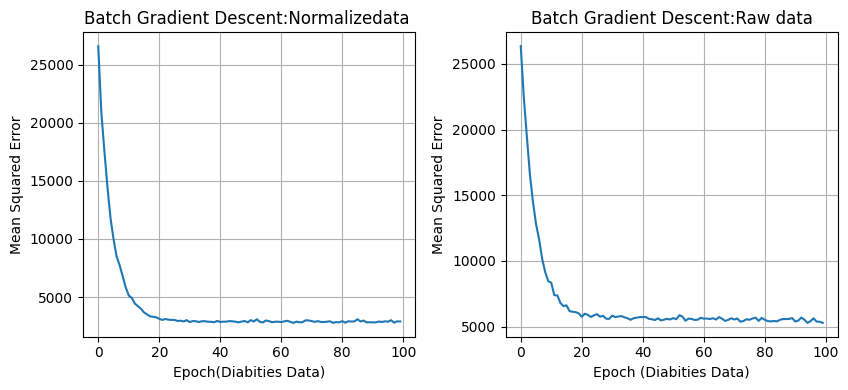

In [ ]:
# Aftere scaling we see the cost .
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

print(f"diabities data sets: {type(load_diabetes)} and X,y: {X.shape}and y :{y.shape}")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
#  scaling the train and test data:
scaler = StandardScaler()  # Fit only on training data to avoid "data leakage"
# Transform test data using the mean/std from training data
X_train_scaled = scaler.fit_transform(X_train)  # for more deatils see the notes/.. docs.
X_test_scaled = scaler.transform(X_test)  
#  this the meansquare error WITHOUT normalization of the data. 
MiniBatch_gd = MinibatchGDs(epochs=100,Batch_size= 32,live_plot=False)
MiniBatch_gd.fit(X_train,y_train)
MiniBatch_gd.predict(X_test)

#  this the meansquare error with NORMALIZATION  of the data. 
MiniBatch_gd_scaled = MinibatchGDs(epochs=100,Batch_size=32,live_plot=False)
MiniBatch_gd_scaled.fit(X_train_scaled,y_train)
MiniBatch_gd_scaled.predict(X_test_scaled)

# bOTH SCALED AND UNSCALED  the result Plotting
fig,ax = plt.subplots(1,2,figsize= (8.6,4))
num_epochs = MiniBatch_gd.epochs
ax = ax.flatten()
ax[0].plot(range(num_epochs), MiniBatch_gd_scaled.jcost)
ax[0].set_title("Batch Gradient Descent:Normalizedata ")
ax[0].set_xlabel("Epoch(Diabities Data)")
ax[0].set_ylabel("Mean Squared Error")
ax[0].grid()
ax[1].plot(range(num_epochs), MiniBatch_gd.jcost)
ax[1].set_title("Batch Gradient Descent:Raw data")
ax[1].set_xlabel("Epoch (Diabities Data)")
ax[1].set_ylabel("Mean Squared Error")
ax[1].grid()
plt.tight_layout()
plt.show()



In [ ]:
# Inbuild SkLearn library for the stochastic Gradient Descent 
from sklearn.linear_model import SGDRegressor

### *Inbuild SkLearn library for the stochastic Gradient Descent.*
1. **Batch Gradient Descent (Full Dataset)**
- Meaning:
    - 📌 Uses all training samples to compute gradient in each step.
sklearn equivalent:

    ✅ **LinearRegression()**
- Because it uses closed-form solution (Normal Equation / SVD), not iterative GD.
But if you want a batch-like GD iterative model, use:
- ✅ SGDRegressor(loss="squared_error", learning_rate="constant", eta0=...)
and set batch_size = full data (but sklearn SGDRegressor doesn't allow explicit batch size)
- So easiest way: use LinearRegression as batch training model.

2. **Stochastic Gradient Descent (SGD)**

    📌  Meaning: Uses 1 sample at a time to update weights.
- sklearn library:

    ✅ SGDRegressor

    ✅ SGDClassifier

- **SGDRegressor**
   ```python
    from sklearn.linear_model import SGDRegressor
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sgd = SGDRegressor(max_iter=1000, learning_rate="constant", eta0=0.01, random_state=42)
    sgd.fit(X_train, y_train)
    print("Coefficient:", sgd.coef_)
    print("Intercept:", sgd.intercept_)
    print("Score:", sgd.score(X_test, y_test))
    ```
3. **Mini-Batch Gradient Descent**
Meaning:

    📌 Uses small chunk of data (like 16, 32, 64 samples) per update.

**sklearn equivalent:**
    - sklearn does NOT directly expose mini-batch for linear regression.

*But sklearn provides:*
- ✅ MiniBatchKMeans (for clustering)

**For neural networks:**
- ✅ MLPClassifier and MLPRegressor use mini-batch internally.

    - For deep learning (best mini-batch examples):
    - TensorFlow / Keras
    - PyTorch
    - sklearn mini-batch example (MLPRegressor)

# Mini-Batch Gradient Descent using `MLPRegressor` (sklearn)

This example shows how to use **Mini-Batch Gradient Descent** in Scikit-learn using `MLPRegressor`.

```python
*from sklearn.neural_network import MLPRegressor*
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate regression dataset
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mini-batch Gradient Descent Model
mlp = MLPRegressor(
    hidden_layer_sizes=(20,),
    solver="sgd",
    batch_size=32,          # Mini-batch size
    learning_rate_init=0.01,
    max_iter=500,
    random_state=42
)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate model performance
print("Score:", mlp.score(X_test, y_test))


